# Quick data analysis and predictions for an overview

# Importing the necessary Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings; warnings.filterwarnings("ignore"); 

## Importing the Dataset 


In [4]:
df = pd.read_csv("heart_disease.csv")

In [5]:
#checking the shape of the dataset
df.shape

(319795, 18)

The survey dataset has information from 319,000 patients across 18 different criteria.

### Personal Key Indicators of Heart Disease 

- 2020 annual CDC survey data of 400k adults related to their health status
- Target - HeartDisease - Yes / No 
- Features
- BMI - Normal weight (18.5 <= BMI < 25.0)
- Smoking - Have you smoked at least 100 cigarettes in your entire life (approx. 5 packs)?           
- AlcoholDrinking - Do you have more than 14 drinks of alcohol (men) or more than 7 (women) in a week?   
- Stroke - Did you have a stroke?          
- PhysicalHealth - For how many days during the past 30 days was your physical health not good?
- MentalHealth - For how many days during the past 30 days was your mental health not good?
- DiffWalking - Do you have serious difficulty walking or climbing stairs? 
- Sex             
- AgeCategory       
- Race             
- Diabetic         
- PhysicalActivity - Have you played any sports (running, biking, etc.) in the past month?  
- GenHealth - How can you define your general health?          
- SleepTime - How many hours on average do you sleep?        
- Asthma           
- KidneyDisease     
- SkinCancer

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

We can see that we do not have any Null Values.

In [11]:
print(df.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [12]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [13]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [14]:
#checking unique values 

df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

## Removing Outliers 

In [16]:
# Identifying the numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns

# Calculating the z-scores for each numerical column
z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())

# Setting a threshold for z-scores (e.g., 3)
threshold = 3

# Creating a mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Removing rows with outliers
df = df[~outlier_mask]

# make a new excel using the df to csv
df.to_csv('newdf.csv')

# Printing the shape of the modified Data set
print("Data set shape after removing outliers:", df.shape)

Data set shape after removing outliers: (315714, 18)


### Univariate Analysis of Categorical Variables:

- HeartDisease
- Smoking
- AlcoholDrinking
- Stroke
- DiffWalking
- Sex
- AgeCategory
- Race
- Diabetic
- PhysicalActivity
- GenHealth
- Asthma
- KidneyDisease
- SkinCancer


In [18]:
df_cat =df.select_dtypes(include=["object"])
df_cat.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
5,Yes,Yes,No,No,Yes,Female,75-79,Black,No,No,Fair,No,No,No
6,No,No,No,No,No,Female,70-74,White,No,Yes,Fair,Yes,No,Yes
7,No,Yes,No,No,Yes,Female,80 or older,White,Yes,No,Good,Yes,No,No
8,No,No,No,No,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,No,Yes,No
9,No,No,No,No,Yes,Male,65-69,White,No,Yes,Good,No,No,No


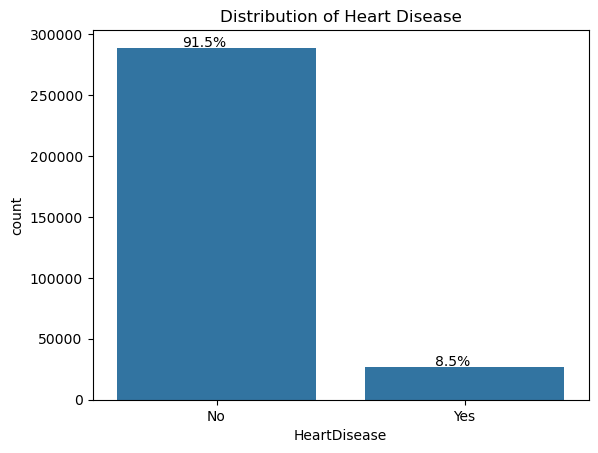

In [19]:
#Visualize the distribution of the target variable 'HeartDisease'

hd = sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')

# Add percentages to each bar
total = len(df['HeartDisease'])
for p in hd.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 1000
    hd.annotate(percentage, (x, y), ha='center')

plt.show()


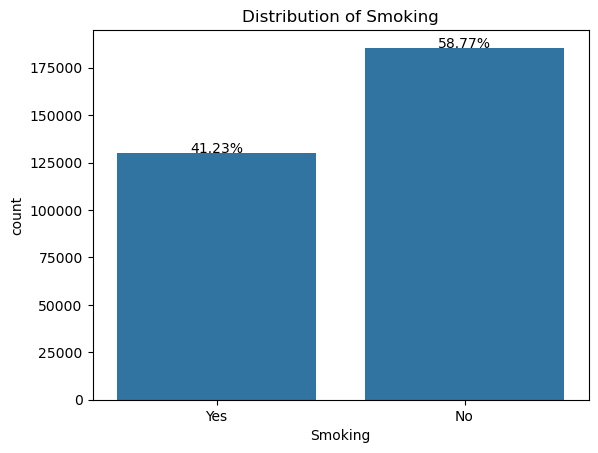

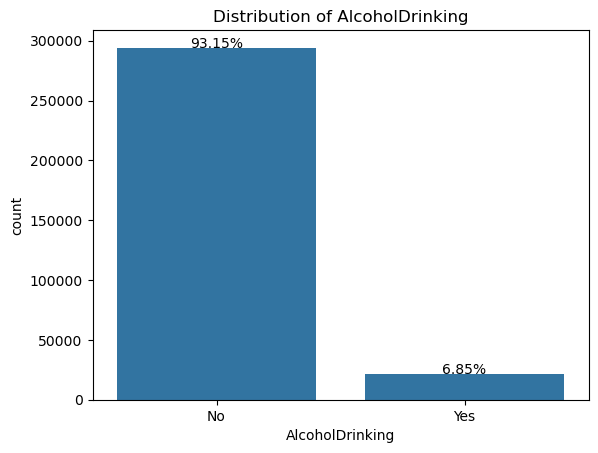

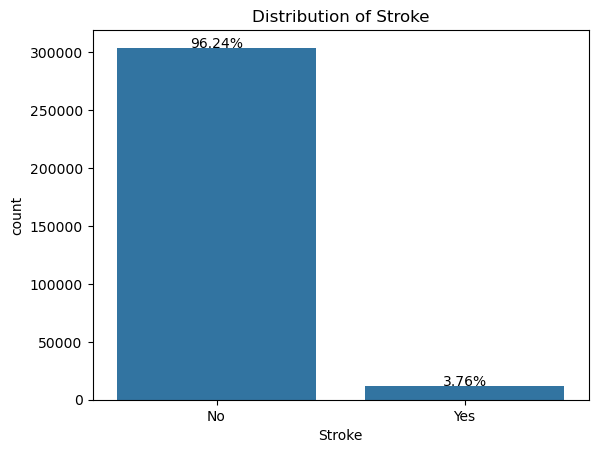

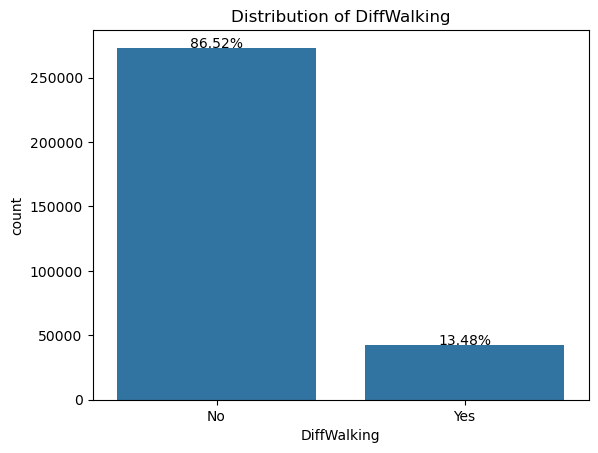

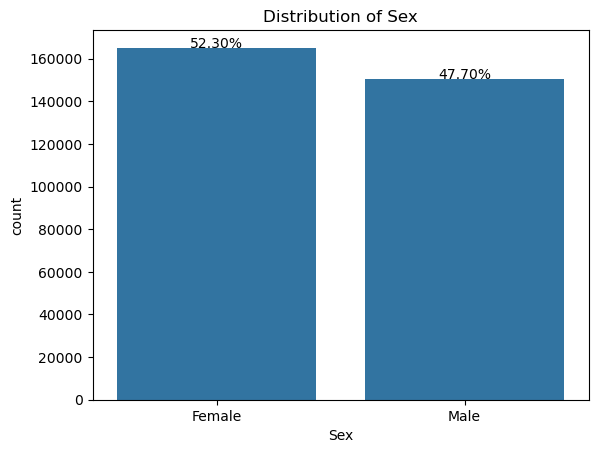

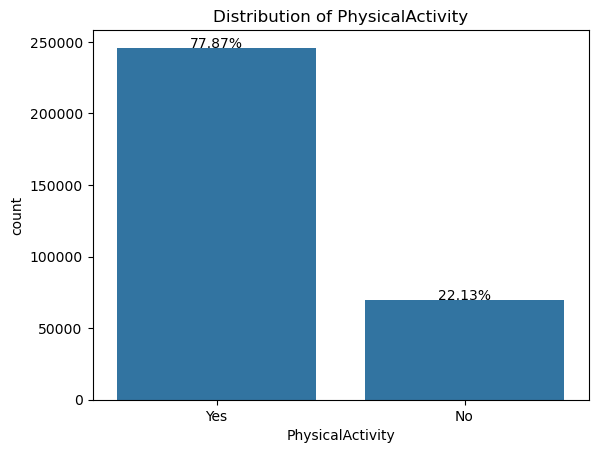

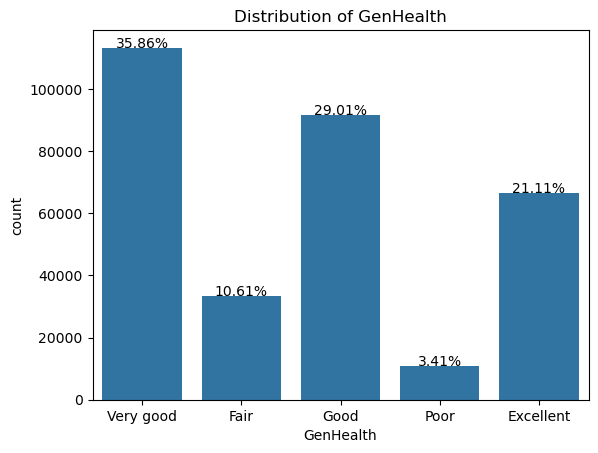

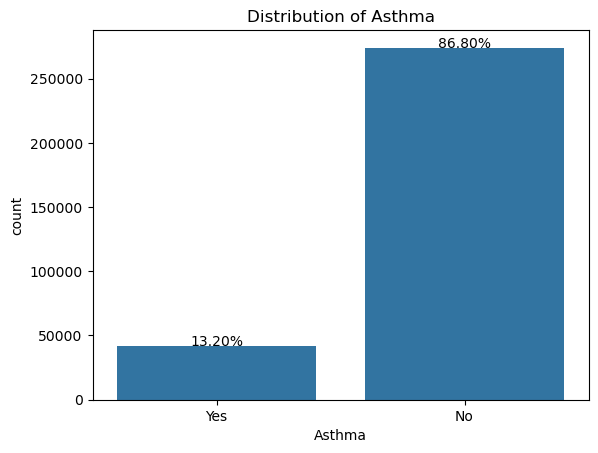

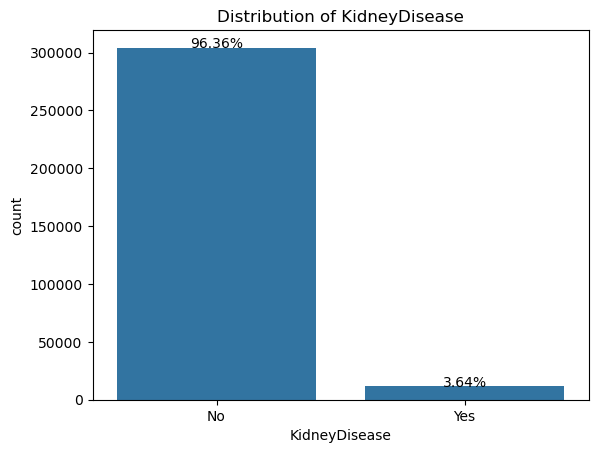

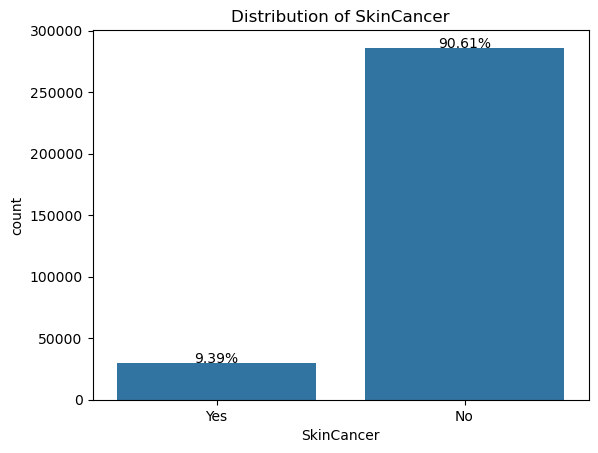

In [20]:
# List of categorical columns
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Loop through each categorical column for analysis
for column in categorical_columns:
    # Countplot for each categorical variable
    ax = sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    
    # Show percentages on top of each bar
    total = float(len(df[column]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 0.02, f'{(height/total)*100:.2f}%', ha="center")
    
    plt.show()


People with limited physical activity showed a higher proportion of heart disease compared to those who were physically active

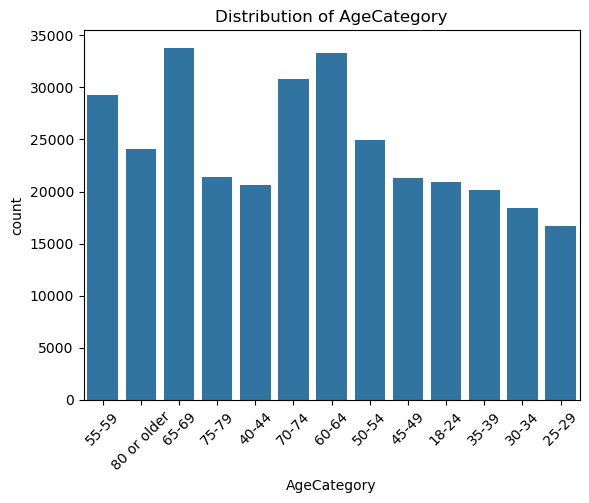

In [22]:

sns.countplot(x='AgeCategory', data=df)
plt.title('Distribution of AgeCategory')
plt.xticks(rotation=45)  # Tilt x-axis ticks
plt.show()

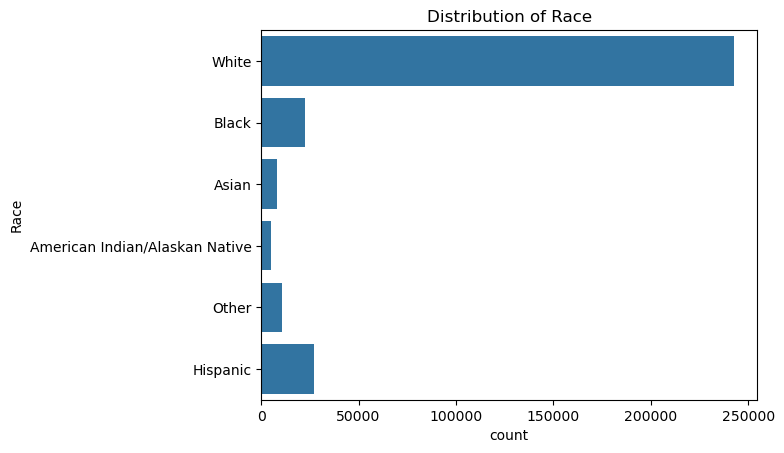

In [23]:
sns.countplot(y='Race', data=df)
plt.title('Distribution of Race')
plt.show()

In [24]:
# Calculate the proportion of people with heart disease based on race
proportion_race_heart_disease = pd.crosstab(df['Race'], df['HeartDisease'], normalize='index')

# Print the proportion table
print("Proportion of people with heart disease based on race:")
print(proportion_race_heart_disease)

Proportion of people with heart disease based on race:
HeartDisease                          No       Yes
Race                                              
American Indian/Alaskan Native  0.895874  0.104126
Asian                           0.967690  0.032310
Black                           0.925969  0.074031
Hispanic                        0.947894  0.052106
Other                           0.919164  0.080836
White                           0.908539  0.091461


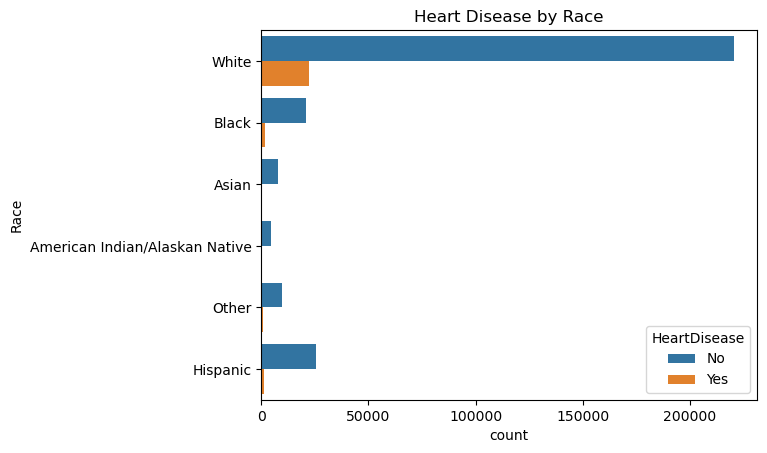

In [25]:
sns.countplot(y='Race', hue='HeartDisease', data=df)
plt.title('Heart Disease by Race')
plt.show()

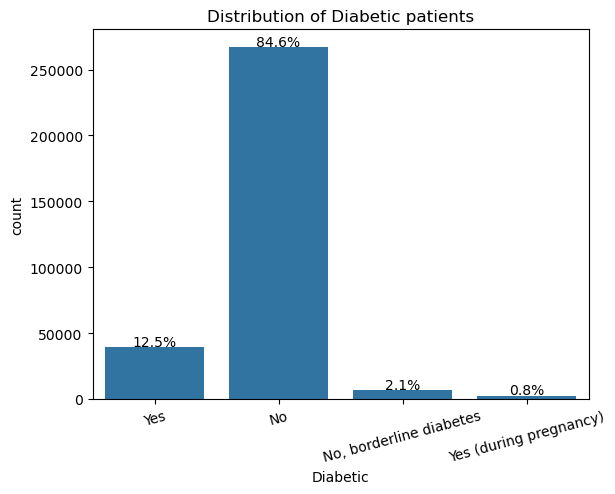

In [26]:
# Countplot for Diabetic 
sns.countplot(x='Diabetic', data=df)
plt.title('Distribution of Diabetic patients')
plt.xticks(rotation=15)  # Tilt x-axis ticks

# Add percentage labels
total = len(df['Diabetic'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1000  # You can adjust the vertical position of the text
    plt.gca().annotate(percentage, (x, y), ha='center')

plt.show()


In [27]:
# Calculate the proportion of people with heart disease based on race
proportion_Diabetic_heart_disease = pd.crosstab(df['Diabetic'], df['HeartDisease'], normalize='index')

# Print the proportion table
print("Proportion of people with heart disease based on Diabetic:")
print(proportion_Diabetic_heart_disease)

Proportion of people with heart disease based on Diabetic:
HeartDisease                   No       Yes
Diabetic                                   
No                       0.935110  0.064890
No, borderline diabetes  0.883728  0.116272
Yes                      0.780081  0.219919
Yes (during pregnancy)   0.957702  0.042298


In [28]:
# Countplot for Diabetic 
sns.countplot(x='Diabetic', hue='HeartDisease', data=df)

plt.title('Distribution of Diabetic patients')
plt.xticks(rotation=15)  # Tilt x-axis ticks

([0, 1, 2, 3],
 [Text(0, 0, 'Yes'),
  Text(1, 0, 'No'),
  Text(2, 0, 'No, borderline diabetes'),
  Text(3, 0, 'Yes (during pregnancy)')])

**Univariate analysis of Numerical Variables:**

- BMI
- PhysicalHealth
- MentalHealth
- SleepTime

In [30]:
# For numerical variables

df_num=df.select_dtypes(include=["float64"])
df_num.head(10)

,BMI
0,16.60
1,20.34
2,26.58
3,24.21
4,23.71
5,28.87
6,21.63
7,31.64
8,26.45
9,40.69


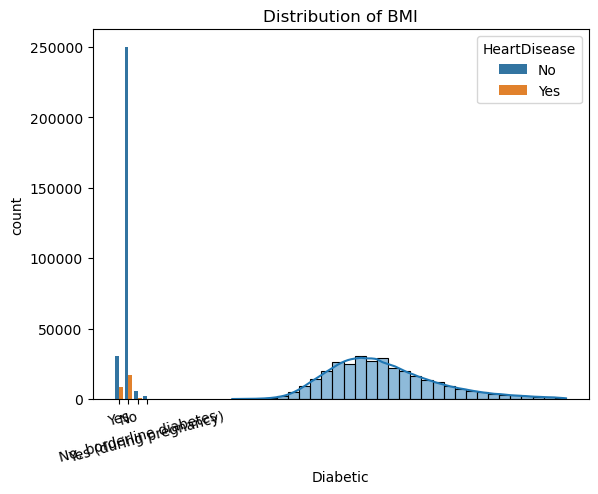

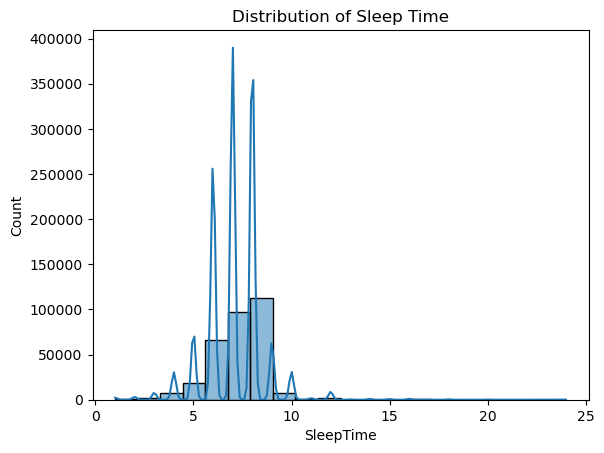

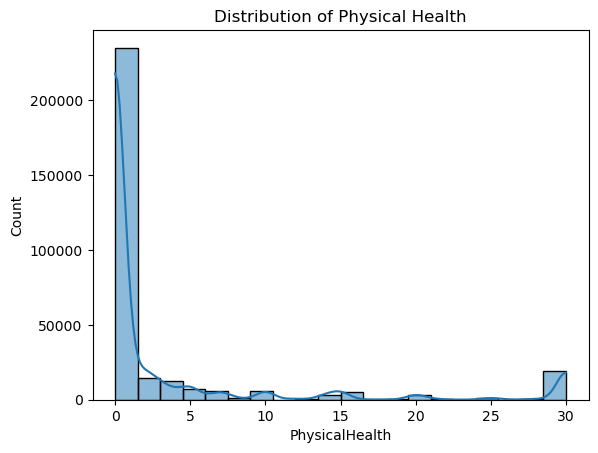

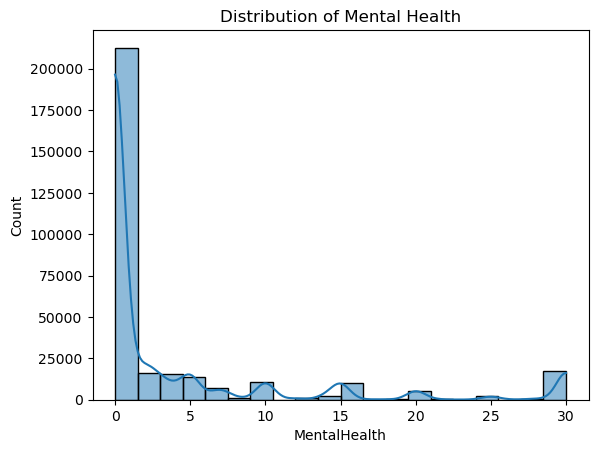

In [31]:
# Visualize the distribution of numerical features

sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

sns.histplot(df['SleepTime'], bins=20, kde=True)
plt.title('Distribution of Sleep Time')
plt.show()

sns.histplot(df['PhysicalHealth'], bins=20, kde=True)
plt.title('Distribution of Physical Health')
plt.show()

sns.histplot(df['MentalHealth'], bins=20, kde=True)
plt.title('Distribution of Mental Health')
plt.show()

In [32]:

# bi variate analysis 
#     - heart > other variables
#     - among other variables



# num - scatter , box, hist , bar , 
# cat - bar , pie , 

# correlation
# 

In [33]:
df[["AgeCategory","MentalHealth"]].groupby(["AgeCategory"],as_index=False).mean().sort_values(by="AgeCategory",ascending=False)

,AgeCategory,MentalHealth
12,80 or older,1.897357
11,75-79,2.275060
10,70-74,2.551369
9,65-69,2.861033
8,60-64,3.505412
7,55-59,4.010547
6,50-54,4.264158
5,45-49,4.317783
4,40-44,4.610852
3,35-39,4.974994


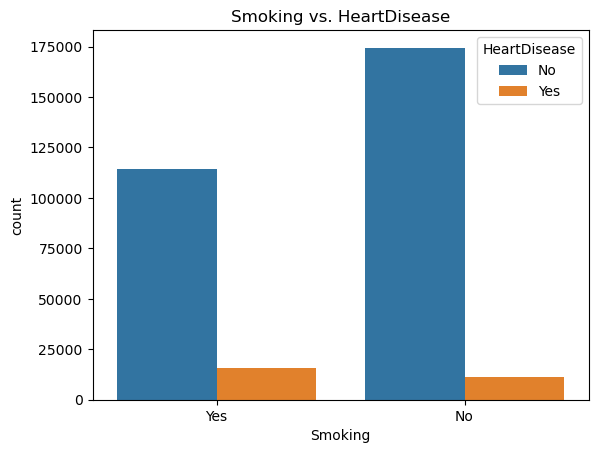

Proportion of people with heart disease based on Smoking:
HeartDisease        No       Yes
Smoking                         
No            0.940159  0.059841
Yes           0.878676  0.121324




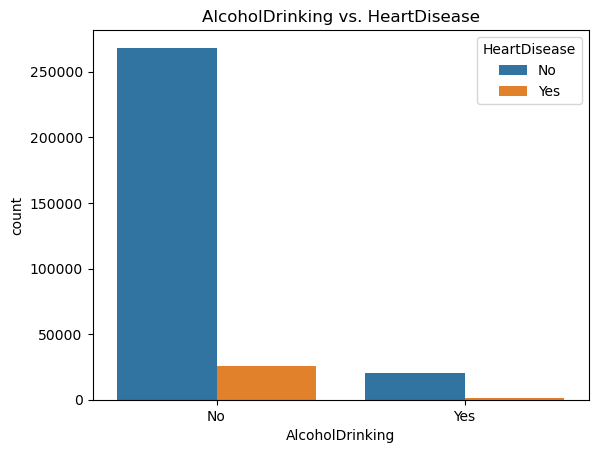

Proportion of people with heart disease based on AlcoholDrinking:
HeartDisease           No       Yes
AlcoholDrinking                    
No               0.912346  0.087654
Yes              0.948325  0.051675




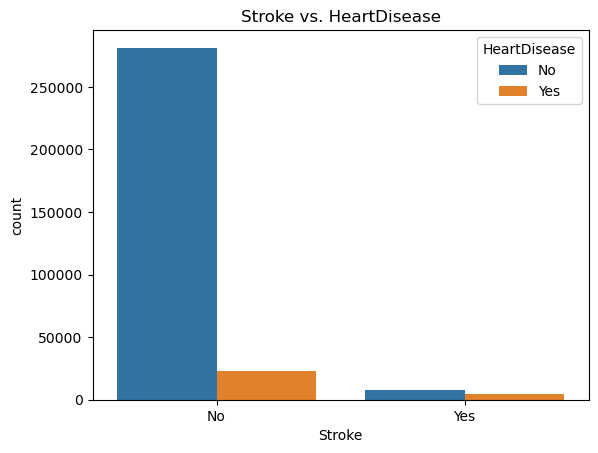

Proportion of people with heart disease based on Stroke:
HeartDisease        No       Yes
Stroke                          
No            0.925672  0.074328
Yes           0.637106  0.362894




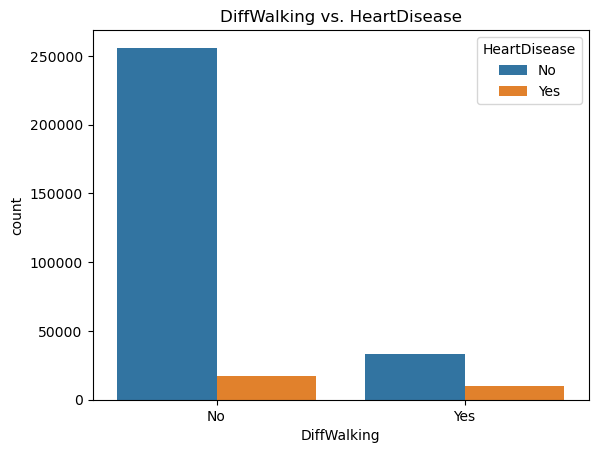

Proportion of people with heart disease based on DiffWalking:
HeartDisease        No       Yes
DiffWalking                     
No            0.936930  0.063070
Yes           0.772828  0.227172




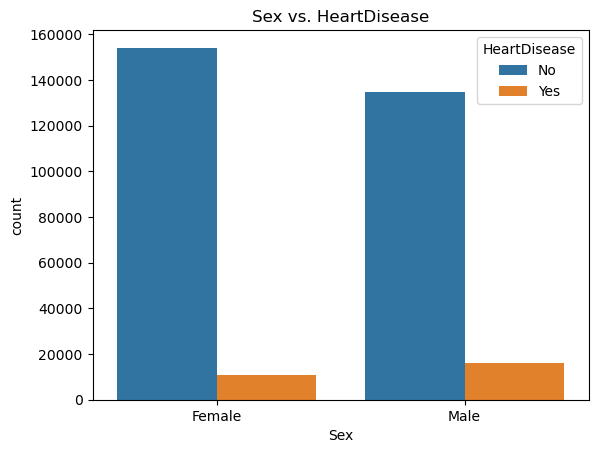

Proportion of people with heart disease based on Sex:
HeartDisease        No       Yes
Sex                             
Female        0.933622  0.066378
Male          0.894178  0.105822




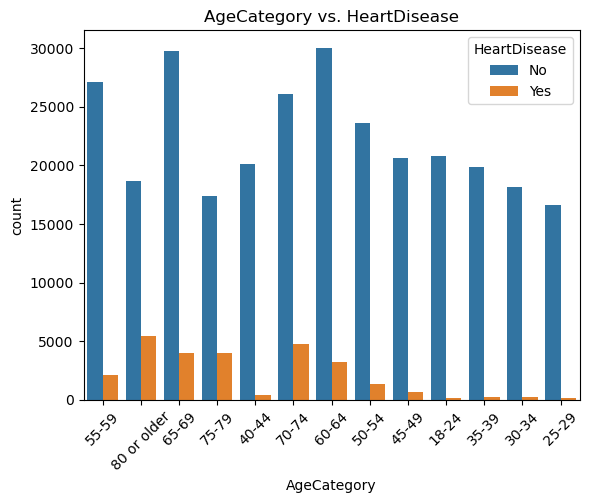

Proportion of people with heart disease based on AgeCategory:
HeartDisease        No       Yes
AgeCategory                     
18-24         0.993977  0.006023
25-29         0.992162  0.007838
30-34         0.988099  0.011901
35-39         0.985959  0.014041
40-44         0.977800  0.022200
45-49         0.967100  0.032900
50-54         0.946856  0.053144
55-59         0.926548  0.073452
60-64         0.902730  0.097270
65-69         0.880953  0.119047
70-74         0.844792  0.155208
75-79         0.811814  0.188186
80 or older   0.774675  0.225325




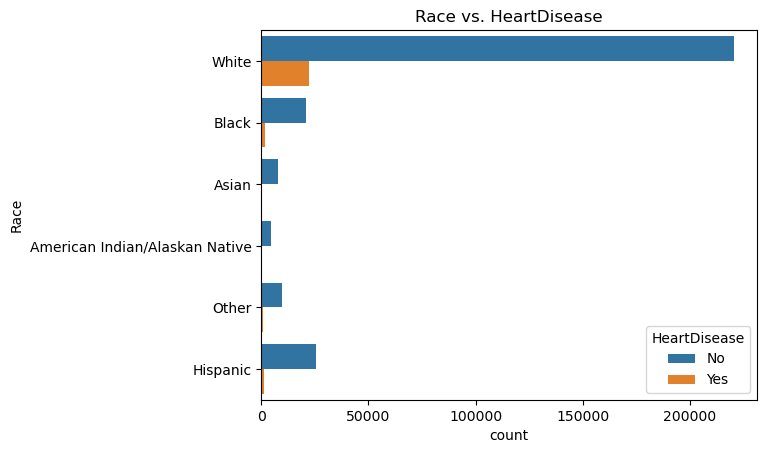

Proportion of people with heart disease based on Race:
HeartDisease                          No       Yes
Race                                              
American Indian/Alaskan Native  0.895874  0.104126
Asian                           0.967690  0.032310
Black                           0.925969  0.074031
Hispanic                        0.947894  0.052106
Other                           0.919164  0.080836
White                           0.908539  0.091461




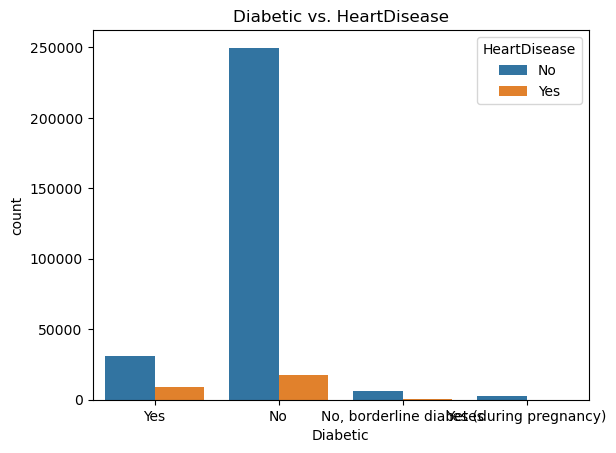

Proportion of people with heart disease based on Diabetic:
HeartDisease                   No       Yes
Diabetic                                   
No                       0.935110  0.064890
No, borderline diabetes  0.883728  0.116272
Yes                      0.780081  0.219919
Yes (during pregnancy)   0.957702  0.042298




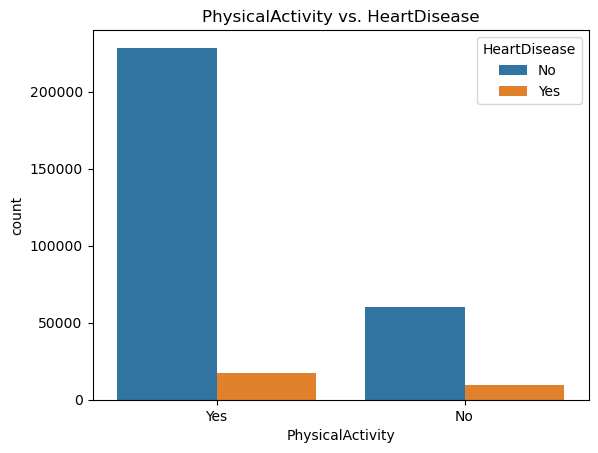

Proportion of people with heart disease based on PhysicalActivity:
HeartDisease            No       Yes
PhysicalActivity                    
No                0.862820  0.137180
Yes               0.929581  0.070419




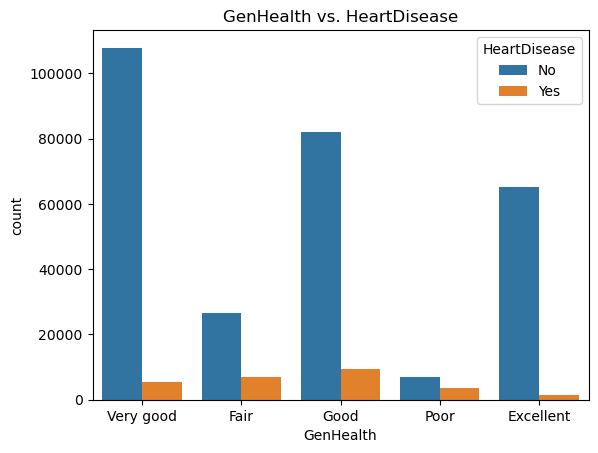

Proportion of people with heart disease based on GenHealth:
HeartDisease        No       Yes
GenHealth                       
Excellent     0.977628  0.022372
Fair          0.793285  0.206715
Good          0.896891  0.103109
Poor          0.657963  0.342037
Very good     0.952698  0.047302




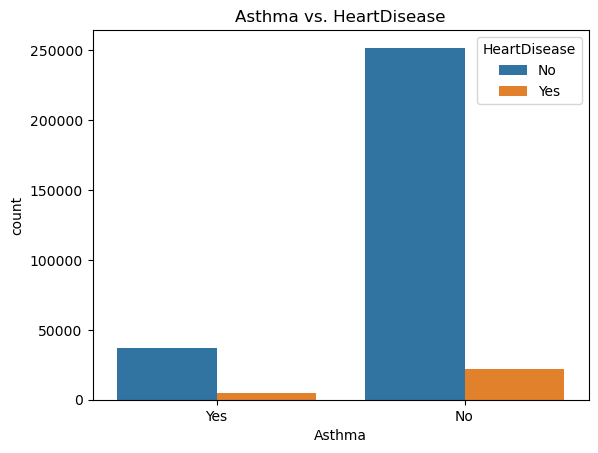

Proportion of people with heart disease based on Asthma:
HeartDisease        No       Yes
Asthma                          
No            0.919138  0.080862
Yes           0.886334  0.113666




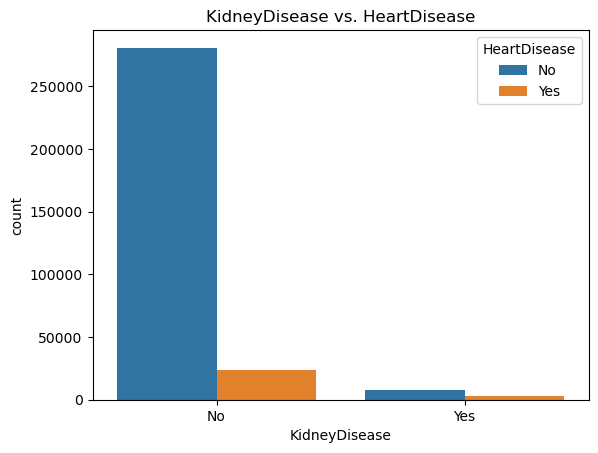

Proportion of people with heart disease based on KidneyDisease:
HeartDisease         No       Yes
KidneyDisease                    
No             0.922599  0.077401
Yes            0.708413  0.291587




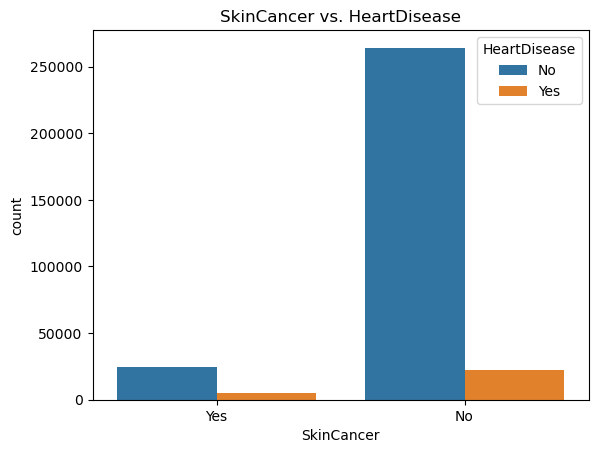

Proportion of people with heart disease based on SkinCancer:
HeartDisease        No       Yes
SkinCancer                      
No            0.923287  0.076713
Yes           0.832968  0.167032




In [34]:
# Bivariate analysis for categorical variables
# Count plots for categorical variables against HeartDisease

categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 
                        'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in categorical_columns:
    if column == 'Race':
        sns.countplot(y=column, hue='HeartDisease', data=df)
    else:
        sns.countplot(x=column, hue='HeartDisease', data=df)
    
    plt.title(f'{column} vs. HeartDisease')

    # Include rotation for 'AgeCategory' column
    if column == 'AgeCategory' :
        plt.xticks(rotation=45)


    plt.show()

    proportion_heart_disease = pd.crosstab(df[column], df['HeartDisease'], normalize='index')

    # Print the proportion table
    print("Proportion of people with heart disease based on {}:".format(column))
    print(proportion_heart_disease)
    print("\n")

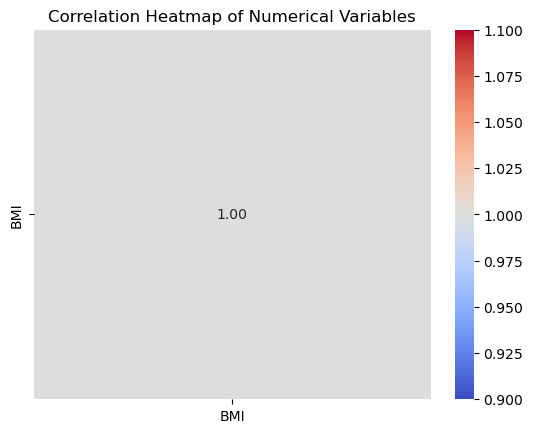

In [35]:
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

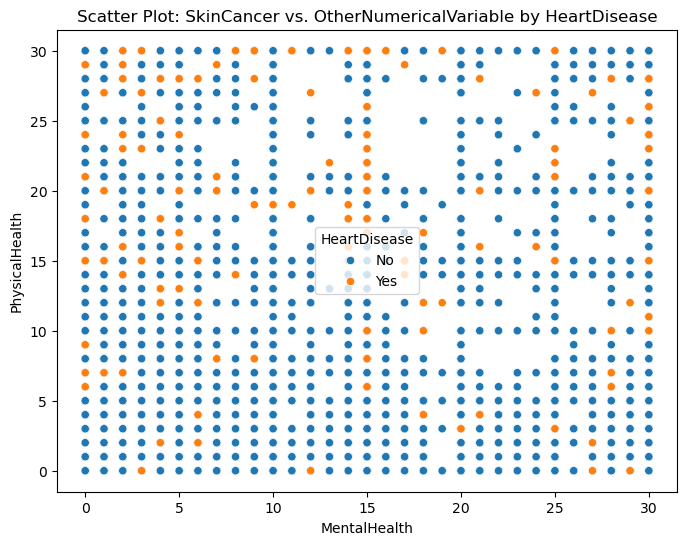

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MentalHealth', y='PhysicalHealth', hue='HeartDisease', data=df)
plt.title(f'Scatter Plot: {column} vs. OtherNumericalVariable by HeartDisease')
plt.show()



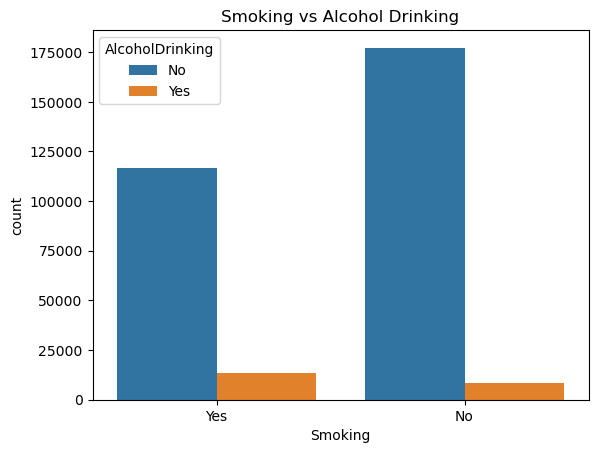

In [37]:
# Explore relationships between categorical features
# Example with 'Smoking' and 'AlcoholDrinking'
sns.countplot(x='Smoking', hue='AlcoholDrinking', data=df)
plt.title('Smoking vs Alcohol Drinking')
plt.show()

In [38]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [50]:
# Convert categorical data to numeric data

df['HeartDisease'] = df['HeartDisease'].replace(['No', 'Yes'], [0, 1])
df['Smoking'] = df['Smoking'].replace(['No', 'Yes'], [0, 1])
df['AlcoholDrinking'] = df['AlcoholDrinking'].replace(['No', 'Yes'], [0, 1])
df['Stroke'] = df['Stroke'].replace(['No', 'Yes'], [0, 1])

df['DiffWalking'] = df['DiffWalking'].replace(['No', 'Yes'], [0, 1])
df['Sex'] = df['Sex'].replace(['Female', 'Male'], [0, 1])

df['PhysicalActivity'] = df['PhysicalActivity'].replace(['No', 'Yes'], [0, 1])
df['Asthma'] = df['Asthma'].replace(['No', 'Yes'], [0, 1])
df['KidneyDisease'] = df['KidneyDisease'].replace(['No', 'Yes'], [0, 1])
df['SkinCancer'] = df['SkinCancer'].replace(['No', 'Yes'], [0, 1])

df['AgeCategory'] = df['AgeCategory'].replace(['18-24', '25-29', '30-34', '35-39', '40-44', '25-29', 
                                               '30-34', '35-40', '41-44', '45-49', '50-54', '55-59', 
                                               '60-64', '65-69', '70-74', '75-79', '80 or older'], 
                                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
df['Race'] = df['Race'].replace(['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'], 
                                [0, 1, 2, 3, 4, 5])
df['Diabetic'] = df['Diabetic'].replace(['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'], 
                                        [0, 1, 2, 3])
df['GenHealth'] = df['GenHealth'].replace(['Excellent', 'Very good', 'Good', 'Fair','Poor'], 
                                          [0, 1, 2, 3, 4])


In [52]:
corrmat = df.corr()
corrmat

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.052611,0.108413,-0.032549,0.196745,0.170037,0.027411,0.200749,0.070572,0.221318,-0.024017,0.181295,-0.099269,0.243333,0.008472,0.039772,0.143630,0.094356
BMI,0.052611,1.000000,0.024838,-0.037962,0.019870,0.087044,0.046221,0.153787,0.045291,0.022678,0.022124,0.209424,-0.135171,0.212496,-0.047535,0.077757,0.046591,-0.028195
Smoking,0.108413,0.024838,1.000000,0.111789,0.061315,0.115847,0.085452,0.120095,0.085698,0.125215,-0.028854,0.058241,-0.097662,0.175928,-0.030909,0.023435,0.035398,0.034379
AlcoholDrinking,-0.032549,-0.037962,0.111789,1.000000,-0.020080,-0.016714,0.051981,-0.034405,0.003140,-0.055143,-0.021821,-0.058998,0.016615,-0.028806,-0.005585,-0.001399,-0.028148,-0.006022
Stroke,0.196745,0.019870,0.061315,-0.020080,1.000000,0.137396,0.046179,0.175760,-0.002988,0.131295,0.008536,0.108891,-0.080069,0.168814,0.012226,0.038424,0.091983,0.048638
PhysicalHealth,0.170037,0.087044,0.115847,-0.016714,0.137396,1.000000,0.284286,0.423608,-0.039034,0.111090,0.011194,0.154804,-0.228075,0.478339,-0.060175,0.112969,0.140363,0.043229
MentalHealth,0.027411,0.046221,0.085452,0.051981,0.046179,0.284286,1.000000,0.147952,-0.098453,-0.147328,0.029328,0.025970,-0.092723,0.237807,-0.119745,0.111461,0.035768,-0.032429
DiffWalking,0.200749,0.153787,0.120095,-0.034405,0.175760,0.423608,0.147952,1.000000,-0.065744,0.234690,0.015468,0.212889,-0.273425,0.407833,-0.020070,0.096717,0.150773,0.067395
Sex,0.070572,0.045291,0.085698,0.003140,-0.002988,-0.039034,-0.098453,-0.065744,1.000000,-0.063398,-0.005966,0.013824,0.046275,-0.023183,-0.017065,-0.067189,-0.008179,0.013140
AgeCategory,0.221318,0.022678,0.125215,-0.055143,0.131295,0.111090,-0.147328,0.234690,-0.063398,1.000000,-0.137319,0.213612,-0.116777,0.185806,0.094771,-0.053758,0.116363,0.248311


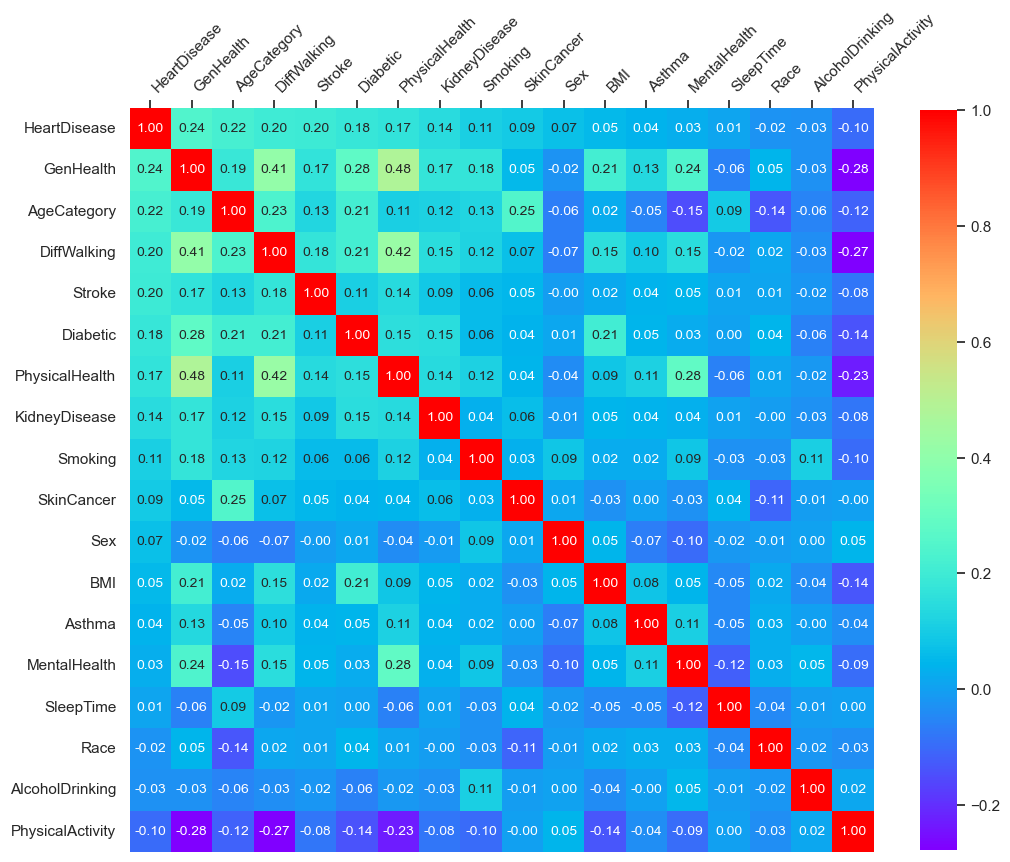

In [54]:
# correlation with HeartDisease

plt.figure(figsize=(12, 12))
k=18
cols = corrmat.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="rainbow", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

# Drinking alcohol to prevent heart disease makes sense.

In [56]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,11,0,3,1,1,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,16,0,0,1,1,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,13,0,3,1,3,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,15,0,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,0,0,1,1,8,0,0,0


In [58]:
df = df.replace(to_replace = {"No" : 0, "Yes" : 1})

In [60]:
df = df.replace(to_replace = {"Male" : 0, "Female" : 1})

In [62]:
x = df.drop(['HeartDisease'], axis = 1) # Independent Feature
y = df['HeartDisease']  # Dependent Feature

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.25) # Splitting into Train and Test.

In [66]:
y_train.value_counts()/len(y_train) # Making sure that the distribution doesn't vary by a significant amount.

HeartDisease
0    0.914809
1    0.085191
Name: count, dtype: float64

In [68]:
clf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=10) # Create instance of Random Forest Classifier 

In [70]:
clf.fit(x_train, y_train) # Fitting model

RandomForestClassifier(max_depth=2, random_state=10)

In [71]:
clf.score(x_train, y_train) # Training Score

0.9148087927867052

In [72]:
clf.score(x_test, y_test) # Testing Score

0.9148095123465393

In [73]:
clf_predict = clf.predict(x_test)

In [74]:
clf_score = round(accuracy_score(clf_predict,y_test)*100,2)

In [75]:
matrix = confusion_matrix(y_test, clf_predict)
sns.heatmap(matrix,annot = True, fmt = "d")

<Axes: >

In [76]:
print("Accuracy is:",round(accuracy_score(y_test, clf_predict),4)*100,"%")

Accuracy is: 91.47999999999999 %


In [77]:
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     72205
           1       0.00      0.00      0.00      6724

    accuracy                           0.91     78929
   macro avg       0.46      0.50      0.48     78929
weighted avg       0.84      0.91      0.87     78929



## Decision Tree Classifier

In [79]:
dt_model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes=6, random_state=10)  #Create instance of Decision Tree Classifier

In [80]:
dt_model.fit(x_train, y_train) # Fitting model

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=10)

In [91]:
dt_model.score(x_train, y_train) # Training Score

0.9148087927867052

In [93]:
dt_model.score(x_test, y_test) # Testing Score

0.9148095123465393

In [95]:
dt_predict = dt_model.predict(x_test)

In [97]:
dt_score = round(accuracy_score(dt_predict,y_test)*100,2)

In [99]:
matrix = confusion_matrix(y_test, dt_predict)
sns.heatmap(matrix,annot = True, fmt = "d")

<Axes: >

In [101]:
print("Accuracy is:",round(accuracy_score(y_test, dt_predict),4)*100,"%")

Accuracy is: 91.47999999999999 %


In [103]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     72205
           1       0.00      0.00      0.00      6724

    accuracy                           0.91     78929
   macro avg       0.46      0.50      0.48     78929
weighted avg       0.84      0.91      0.87     78929



## Logistic Regression

In [106]:
logreg = LogReg(max_iter=950) # Create instance of Logictic Regression
logreg.fit(x_train, y_train) # Fitting model

LogisticRegression(max_iter=950)

In [107]:
logreg.score(x_train, y_train)

0.9163502755664421

In [108]:
logreg.score(x_test, y_test)

0.9164945710702024

In [109]:
lr_predict = logreg.predict(x_test)

In [110]:
lr_score = round(accuracy_score(lr_predict,y_test)*100,2)

In [111]:
matrix = confusion_matrix(y_test, lr_predict)
sns.heatmap(matrix,annot = True, fmt = "d")

<Axes: >

In [112]:
print("Accuracy is:",round(accuracy_score(y_test, lr_predict),2)*100,"%")

Accuracy is: 92.0 %


In [113]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     72205
           1       0.55      0.11      0.18      6724

    accuracy                           0.92     78929
   macro avg       0.74      0.55      0.57     78929
weighted avg       0.89      0.92      0.89     78929



## K-Nearest Neighbour 

In [115]:
knn = KNeighborsClassifier(5) # Create instance of K-Nearest Neighbour
knn.fit(x_train, y_train) # Fitting model

KNeighborsClassifier()

In [116]:
knn.score(x_test, y_test)

0.9064982452583968

In [117]:
knn_predict = knn.predict(x_test)

In [118]:
knn_score = round(accuracy_score(knn_predict,y_test)*100,2)

In [119]:
matrix = confusion_matrix(y_test, knn_predict)
sns.heatmap(matrix,annot = True, fmt = "d")

<Axes: >

In [120]:
print("Accuracy is:", round(accuracy_score(y_test, knn_predict),4)*100,"%")

Accuracy is: 90.64999999999999 %


In [121]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     72205
           1       0.33      0.09      0.14      6724

    accuracy                           0.91     78929
   macro avg       0.62      0.54      0.55     78929
weighted avg       0.87      0.91      0.88     78929



# Conclusion

In [123]:
accuracy = []   # Initialize Empty List

classifiers = ['Random Forests', 'Decision Trees', 'Logistic Regression','K-Nearest Neighbour']  # List of algorithms

models = [RandomForestClassifier(max_depth=2, n_estimators=100, random_state=10), DecisionTreeClassifier(max_depth = 4, max_leaf_nodes=6, random_state=10), LogReg(max_iter=950), 
        KNeighborsClassifier(5)] # List of algorithms with parameters

for i in models:      # loop through algorithms and append the score into the list
    model = i
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    accuracy.append(round(score*100, 2))


In [124]:
# Creating a dataframe from accuracy results
summary = pd.DataFrame({'Accuracy(%)':accuracy}, index=classifiers)       
summary

,Accuracy(%)
Random Forests,91.48
Decision Trees,91.48
Logistic Regression,91.65
K-Nearest Neighbour,90.65


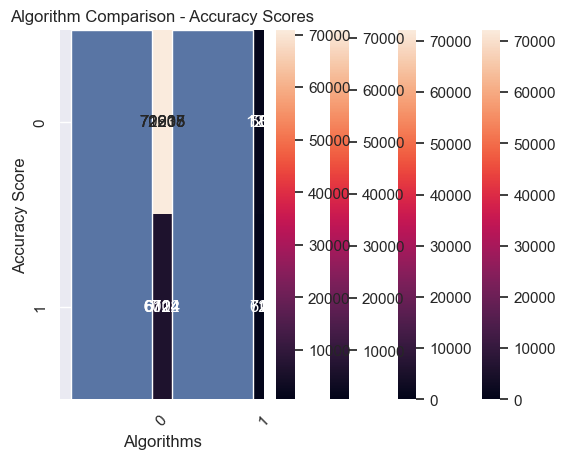

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = [clf_score, dt_score, lr_score]
algorithms = ['Random Forests', 'Decision Trees', 'Logistic Regression']

sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Algorithm Comparison - Accuracy Scores")

# Use x and y arguments separately
sns.barplot(x=algorithms, y=scores)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding annotation
for i, score in enumerate(scores):
    plt.annotate(f'{score:.2f}', (i, score), ha='center', va='bottom')

plt.show()
